In [1]:
from typing import Literal, TypedDict, List
import random 

class ProsesState(TypedDict):
    nilai : int
    riwayat : List[str]


In [ ]:
def input_nilai(state:ProsesState) -> ProsesState:
    masukan = int(input("Masukkan Nilai Awal: "))
    nilai = state["nilai"] + masukan
    riwayat = state["riwayat"] + [f"Menambahkan nilai {nilai} "]

def bonus(state:ProsesState) -> ProsesState:
    nilai = state["nilai"] * 2
    log = state["riwayat"] + [f"Menambahkan bonus pada state nilai"]
    return {"nilai": nilai, "riwayat": log} 
 
def diskon(state:ProsesState) -> ProsesState:
    nilai = state["nilai"] - 5
    log = state["riwayat"] + [f"Mengurangi lima nilai dari state nilai"]
    return {"nilai": nilai, "riwayat": log}

def cek_kondisi(state : ProsesState) -> Literal["bonus", "diskon"]:
    if state["nilai"] > 50: 
        return "diskon"
    else:
        return "bonus"
 
def potongan_admin(state: ProsesState ) -> ProsesState:
    nilai = state["nilai"] - 2
    log = state["riwayat"] + [f"Biaya dipotong admin"]
    return {"nilai" : nilai, "riwayat" : log}

def error_negatif(state: ProsesState) -> ProsesState:
    nilai = state["nilai"]

    log = state["riwayat"] + ["ERROR: Nilai tidak boleh negatif!"]
    print(log)
    exit()

# 1. BIKIN STATE AWAL (Modal)
state_sekarang = {"nilai": 0, "riwayat": []}
state_sekarang = input_nilai(state_sekarang)

if state_sekarang["nilai"] < 0:
    error_negatif(state_sekarang)
else:
    response = cek_kondisi(state_sekarang)
 
    if response == "bonus":
        hasil = bonus(state_sekarang)
        hasil_akhir = potongan_admin(hasil)
    elif response == "diskon":
        hasil = diskon(state_sekarang)
        hasil_akhir = potongan_admin(hasil)


    print(hasil)
    print(hasil_akhir)

TypeError: 'NoneType' object is not subscriptable

In [4]:
from typing import TypedDict, Literal, List

# Definisi tipe data state
class ProsesState(TypedDict):
    nilai: int
    riwayat: List[str]

# --- NODE DEFINITIONS ---

def input_nilai(state: ProsesState) -> ProsesState:
    # Mengambil input user dan ubah ke integer (PENTING!)
    masukan = int(input("Masukkan Nilai Tambahan: ")) 
    
    # Update nilai
    nilai_baru = state["nilai"] + masukan
    
    # Update riwayat
    riwayat_baru = state["riwayat"] + [f"Menambahkan nilai {masukan}"]
    
    # Kembalikan state baru
    return {"nilai": nilai_baru, "riwayat": riwayat_baru}

def bonus(state: ProsesState) -> ProsesState:
    nilai_baru = state["nilai"] * 2
    riwayat_baru = state["riwayat"] + ["Dapat Bonus (dikali 2)"]
    return {"nilai": nilai_baru, "riwayat": riwayat_baru}

def diskon(state: ProsesState) -> ProsesState:
    nilai_baru = state["nilai"] - 5
    riwayat_baru = state["riwayat"] + ["Kena Potongan (dikurang 5)"]
    return {"nilai": nilai_baru, "riwayat": riwayat_baru}

# Perhatikan kurung siku [] bukan kurung biasa () untuk Literal
def cek_kondisi(state: ProsesState) -> Literal["bonus", "diskon"]:
    if state["nilai"] > 50:
        return "diskon"
    else:
        return "bonus"

# --- EKSEKUSI MANUAL (Simulasi Graph) ---

# 1. Inisialisasi State Awal (Wajib ada modal awal)
state_sekarang = {"nilai": 0, "riwayat": []} 

# 2. Jalankan Node 1 (Input) & Update State
# Kita harus "menangkap" return value-nya agar state terupdate
state_sekarang = input_nilai(state_sekarang) 
print(f"State setelah input: {state_sekarang}")

# 3. Cek Kondisi (Router)
keputusan = cek_kondisi(state_sekarang)
print(f"Router memutuskan ke arah: {keputusan}")

# 4. Jalankan Node berdasarkan keputusan
if keputusan == "bonus":
    state_sekarang = bonus(state_sekarang) # Pass state lama, simpan state baru
elif keputusan == "diskon":
    state_sekarang = diskon(state_sekarang)

# 5. Hasil Akhir
print("\n--- HASIL AKHIR ---")
print(state_sekarang)

State setelah input: {'nilai': 89, 'riwayat': ['Menambahkan nilai 89']}
Router memutuskan ke arah: diskon

--- HASIL AKHIR ---
{'nilai': 84, 'riwayat': ['Menambahkan nilai 89', 'Kena Potongan (dikurang 5)']}


In [5]:
from langgraph.graph import StateGraph, START, END

In [34]:

class GameState(TypedDict):
    HP : int
    gold : int
    history : List[str]
    potion : int

def start_play(state: GameState) -> GameState:
    nama = input("Masukkan Nama Kamu: ")
    log = state["history"] + [f"Selamat Datang {nama} pada perjalanan yang seru!"]
    print("Function start play dieksekusi")
    return {"HP" : 100, "gold": state["gold"], "history" : log, "potion" : state["potion"]}

def input_gold(state: GameState) -> GameState:
    masukan = state["gold"] + 50
    log = state["history"] + [f"Mendapatkan sebanyak 50 Gold, Total Gold : {masukan}"]
    print("Function input gold dieksekusi")
    return {"HP" : 100, "gold": masukan, "history" : log, "potion" : state["potion"]}

def beli_potion(state : GameState) -> GameState:
    gold = state["gold"]
    potion = 50

    print("Function beli potion dieksekusi")

    if gold >= potion:
        total_gold = gold - potion
        log = state["history"] + [f"Kamu Membeli Potion seharga 50 Gold, Total Gold : {total_gold}"]
        potion = state["potion"] + 1
        return {"HP" : 100, "gold": total_gold, "history" : log, "potion" : potion}
    else:
        log = state["history"] + [f"Gold tidak cukup untuk membeli Potion, Pulang. Total Gold : {gold}"]
        potion = state["potion"]
        return {"HP" : 100, "gold": gold, "history" : log,  "potion" : potion}

def pilih_jalur(state : GameState) -> Literal["input_gold", "beli_potion", "__end__"]:

    print("1: Beli Potion")
    print("2: Cari Gold")
    kondisi = int(input("Mau nyari gold atau beli potion?"))

    print("Function pilih jalur dieksekusi")

    if kondisi == 1:
        return "beli_potion"    
    elif kondisi == 2:
        return "input_gold"
    elif kondisi == 3:
        return "__end__"

builder = StateGraph(GameState)

builder.add_node("input_gold", input_gold)
builder.add_node("beli_potion", beli_potion)
builder.add_node("Start Game", start_play)

# WORKFLOW Graph
builder.add_edge(START, "Start Game")
builder.add_conditional_edges("Start Game", pilih_jalur)
builder.add_edge("beli_potion", "Start Game")
builder.add_edge("input_gold", "Start Game")

mesin = builder.compile()

curr_state = {"HP" : 100, "gold": 10, "history" : [], "potion" : 0 }
hasil_akhir = mesin.invoke(curr_state)

print(f"Sisa Gold: {hasil_akhir['gold']}")
print(f"Jumlah Potion: {hasil_akhir['potion']}")
print("Riwayat Perjalanan:")
for catat in hasil_akhir['history']:
    print(f"- {catat}")
        




Function start play dieksekusi
1: Beli Potion
2: Cari Gold
Function pilih jalur dieksekusi
Function beli potion dieksekusi
Function start play dieksekusi
1: Beli Potion
2: Cari Gold
Function pilih jalur dieksekusi
Function input gold dieksekusi
Function start play dieksekusi
1: Beli Potion
2: Cari Gold
Function pilih jalur dieksekusi
Sisa Gold: 60
Jumlah Potion: 0
Riwayat Perjalanan:
- Selamat Datang fARHAN pada perjalanan yang seru!
- Gold tidak cukup untuk membeli Potion, Pulang. Total Gold : 10
- Selamat Datang FARHAN pada perjalanan yang seru!
- Mendapatkan sebanyak 50 Gold, Total Gold : 60
- Selamat Datang 3 pada perjalanan yang seru!


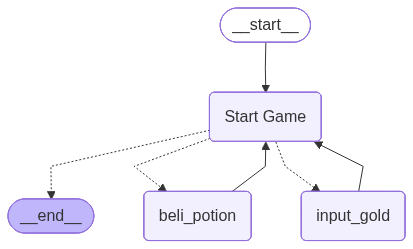

In [35]:
from IPython.display import Image, display

display(Image(mesin.get_graph().draw_mermaid_png()))
